In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [6 7 7 0 7 4 4 7 8 1]


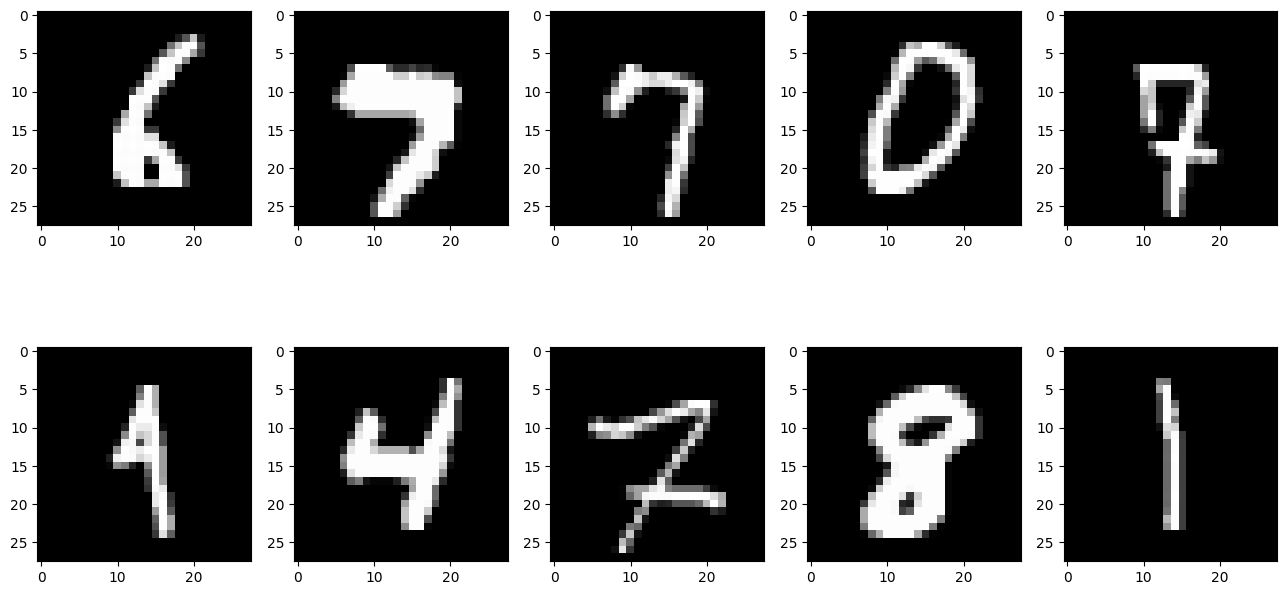

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,input_dim=64,activation='relu'))
# model.add(Dense(32,input_dim=64,activation='relu'))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
# train_info = model.fit(new_train_data , new_train_target , epochs = 10)
train_info = model.fit(new_train_data, new_train_target,
                       epochs=20, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8636 - loss: 0.8597 - val_accuracy: 0.9683 - val_loss: 0.3463
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9593 - loss: 0.3430 - val_accuracy: 0.9688 - val_loss: 0.2782
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9679 - loss: 0.2694 - val_accuracy: 0.9725 - val_loss: 0.2370
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9721 - loss: 0.2351 - val_accuracy: 0.9763 - val_loss: 0.2137
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9741 - loss: 0.2139 - val_accuracy: 0.9765 - val_loss: 0.2032
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9746 - loss: 0.2008 - val_accuracy: 0.9750 - val_loss: 0.1992
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9758 - loss: 0.1895 - val_accuracy: 0.9770 - val_loss: 0.1837
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9764 - loss: 0.1842 - val_accuracy:

Plot the loss and accuracy graphs

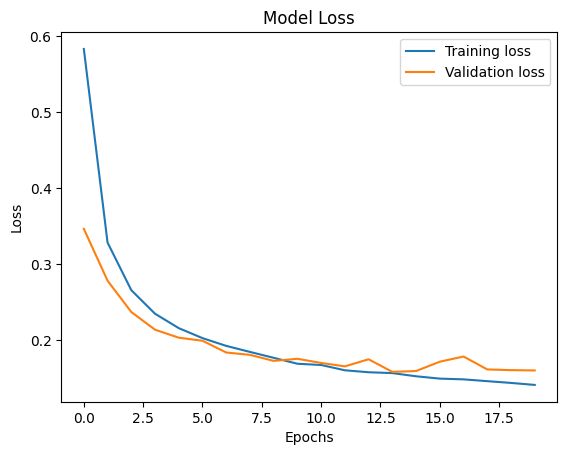

In [ ]:
# plt.plot(train_info.history['loss'])
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.title('Model loss')
# plt.show()

plt.plot(train_info.history['loss'], label='Training loss')
plt.plot(train_info.history['val_loss'], label='Validation loss')   # ✅ NEW: Validation loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

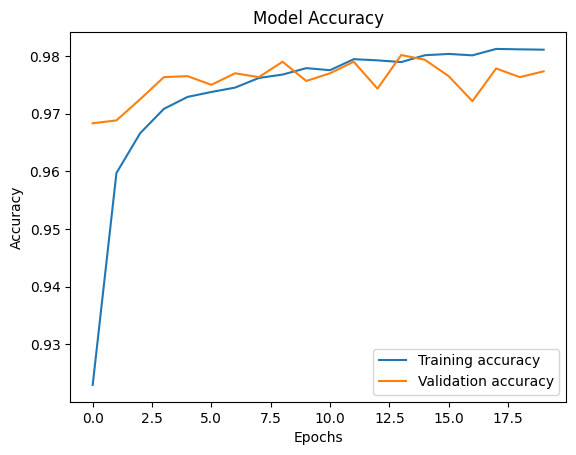

In [ ]:
# plt.plot(train_info.history['accuracy'])
# plt.xlabel('epochs')
# plt.ylabel('accuracy')
# plt.title('Model accuracy')
# plt.show()
plt.plot(train_info.history['accuracy'], label='Training accuracy')
plt.plot(train_info.history['val_accuracy'], label='Validation accuracy')   # ✅ NEW: Validation accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.1729
Loss of the Test dataset is: 0.15951134264469147
Accuracy of the test dataset is: 0.9750000238418579


Save the model weights

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


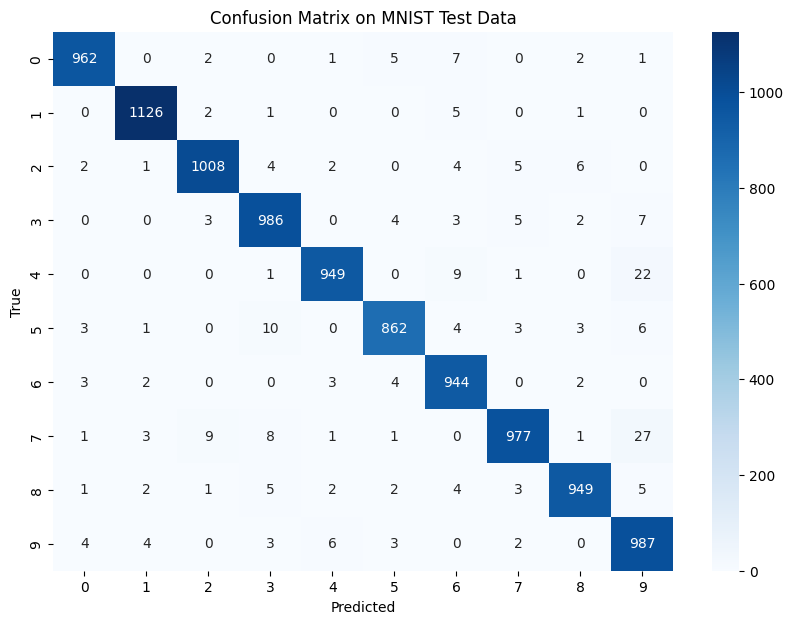

In [ ]:
y_pred = model.predict(new_test_data).argmax(axis=1)
cm = confusion_matrix(test_target, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on MNIST Test Data")
plt.show()


In [ ]:
model.save_weights('MNIST_WEIGHTS_V2.weights.h5')